# Loading librairies

In [2]:
# Call data manipulation libraries
import numpy as np
import pandas as pd
# Misc

import os, time, gc

# Plotting libraries to plot feature importance

import matplotlib.pyplot as plt
import seaborn as sns

# Feature creation libraries
from sklearn.random_projection import SparseRandomProjection as sr # Projection features
from sklearn.cluster import KMeans                    # Cluster features
from sklearn.preprocessing import PolynomialFeatures  # Interaction features

# For feature selection
# Ref: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif  # Selection criteria

 #Data processing
#  Scaling data in various manner
from sklearn.preprocessing import StandardScaler, MinMaxScaler, scale
# Transform categorical (integer) to dummy
from sklearn.preprocessing import OneHotEncoder

# Splitting data
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import naive_bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDRegressor

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.learning_curve import learning_curve
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


%matplotlib inline
plt.style.use('seaborn')

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

C:\Users\PC\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\PC\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\PC\Anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


# Loading the data 

In [3]:
data =pd.read_csv(r"C:\Users\PC\Desktop\heart_disease\dataset\heart.csv")


Let's take a look

In [222]:
data.head(10)


,age,sex,chest_pain,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_electrocardiographic,maximum_heart_rate,exercise_induced_angina,oldpeak,slope,num_major_vessels,thal,heart_disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [221]:
data.tail(10)

,age,sex,chest_pain,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_electrocardiographic,maximum_heart_rate,exercise_induced_angina,oldpeak,slope,num_major_vessels,thal,heart_disease
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


The first part of the notebook will be simple exploration of the data and visual analysis

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


We can see that we have a small 303 rows data set. Our data has no nulls and no other chars to represent it. all our data is numeric.

# Improve The Dataframe Descriptors

In [6]:
header = ['age', 'sex', 'chest_pain', 'resting_blood_pressure', 'serum_cholesterol', 'fasting_blood_sugar',
          'resting_electrocardiographic', 'maximum_heart_rate', 'exercise_induced_angina', 'oldpeak',
          'slope', 'num_major_vessels', 'thal','heart_disease']
data.columns = header

data.head(10)
data.tail()

,age,sex,chest_pain,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_electrocardiographic,maximum_heart_rate,exercise_induced_angina,oldpeak,slope,num_major_vessels,thal,heart_disease
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age                             303 non-null int64
sex                             303 non-null int64
chest_pain                      303 non-null int64
resting_blood_pressure          303 non-null int64
serum_cholesterol               303 non-null int64
fasting_blood_sugar             303 non-null int64
resting_electrocardiographic    303 non-null int64
maximum_heart_rate              303 non-null int64
exercise_induced_angina         303 non-null int64
oldpeak                         303 non-null float64
slope                           303 non-null int64
num_major_vessels               303 non-null int64
thal                            303 non-null int64
heart_disease                   303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


## Assess and Remove Duplicates

In [8]:
Duplicated=data.duplicated()
Duplicated2=pd.Series.to_frame(Duplicated)
Duplicated2.head()
print(Duplicated2.loc[Duplicated2.loc[:,0]==True])

        0
164  True


In [9]:
data.loc[164, :]

age                              38.0
sex                               1.0
chest_pain                        2.0
resting_blood_pressure          138.0
serum_cholesterol               175.0
fasting_blood_sugar               0.0
resting_electrocardiographic      1.0
maximum_heart_rate              173.0
exercise_induced_angina           0.0
oldpeak                           0.0
slope                             2.0
num_major_vessels                 4.0
thal                              2.0
heart_disease                     1.0
Name: 164, dtype: float64

As we can see, there is one duplicated row- row 164. Let's see what that is and what row it is a duplicate of.

In [10]:
data.loc[data.loc[:,'serum_cholesterol']==175.0]

,age,sex,chest_pain,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_electrocardiographic,maximum_heart_rate,exercise_induced_angina,oldpeak,slope,num_major_vessels,thal,heart_disease
27,51,1,2,110,175,0,1,123,0,0.6,2,0,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


We are assuming that line 164 is invalid as the duplicates are two lines next to each other. Besides, the fact that all the 14 features are the same for two different patients is really odd. We assume that is a data input error and we will drop the duplicated row

In [11]:
data= data.drop(data.index[164])

In [12]:
data.shape

(302, 14)

# Data Visualization

## 1. Age Analysis : 
This feature displays the age of the individual.

In [13]:
data["age"].unique()

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77], dtype=int64)

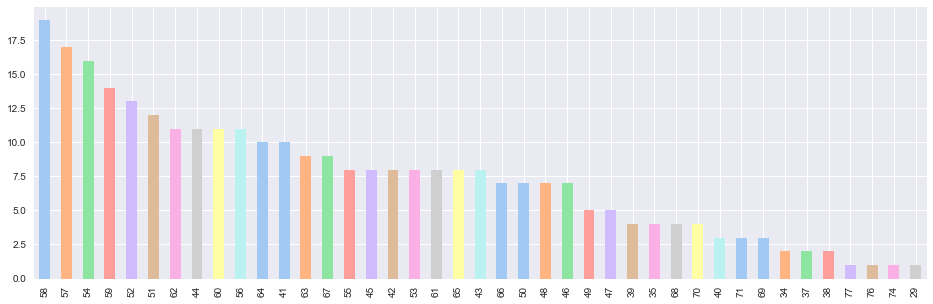

In [14]:
plt.figure(figsize=(16, 5))
sns.set_palette("pastel")
data.age.value_counts().plot.bar()

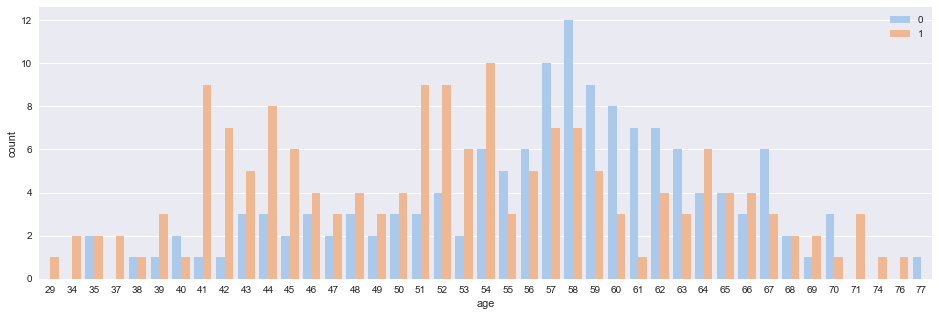

In [15]:
plt.figure(figsize=(16, 5))
sns.countplot(x = "age", hue = "heart_disease", data = data)
plt.legend(loc="upper right")

We can clearly identify that the majority of the sample data are within the range of 40 years to around 67 years. 
The most peapole suffering from heart disease are of the age of 58. 

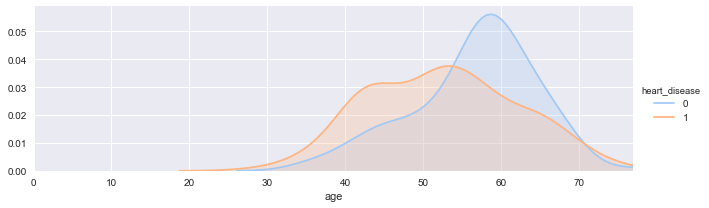

In [16]:
facet = sns.FacetGrid(data, hue = "heart_disease", aspect = 3)
facet.map(sns.kdeplot,"age",shade= True)
facet.set(xlim=(0, data["age"].max()))
facet.add_legend()

## 2.Sex Analysis:
Sex Feature displays the gender of the individual using the following format :
1 = male
0 = female

In [17]:
data["sex"].value_counts()

1    206
0     96
Name: sex, dtype: int64

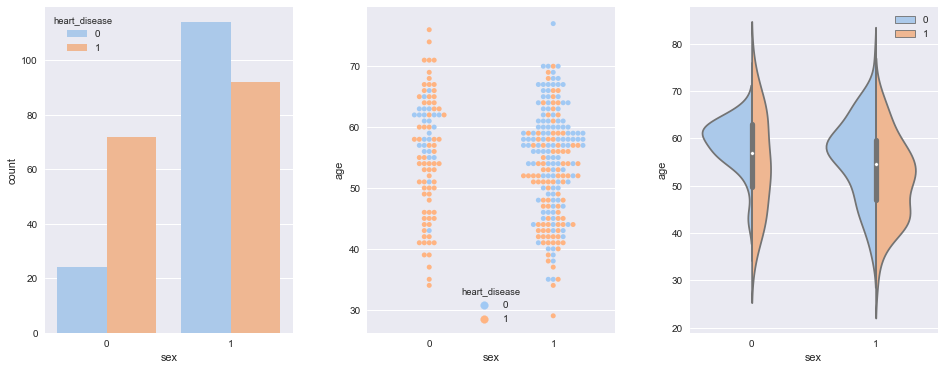

In [19]:
_, ax = plt.subplots(1, 3, figsize=(16, 6))
sns.countplot(x = "sex", hue = "heart_disease", data = data, ax = ax[0])
sns.swarmplot(x = "sex", y = "age", hue = "heart_disease", data = data, ax = ax[1])
sns.violinplot(x = "sex", y = "age", hue= "heart_disease", split = True, data = data, ax=ax[2])
sns.despine(left=True)
plt.legend(loc="upper right")
plt.subplots_adjust(wspace=0.3)

## 3.Chest pain type Analysis: 
This feature displays the type of chest-pain experienced by the individual using the following format :


0 = typical angina
1 = atypical angina
2 = non — anginal pain
3 = asymptotic

In [22]:
data.chest_pain.unique()

array([3, 2, 1, 0], dtype=int64)

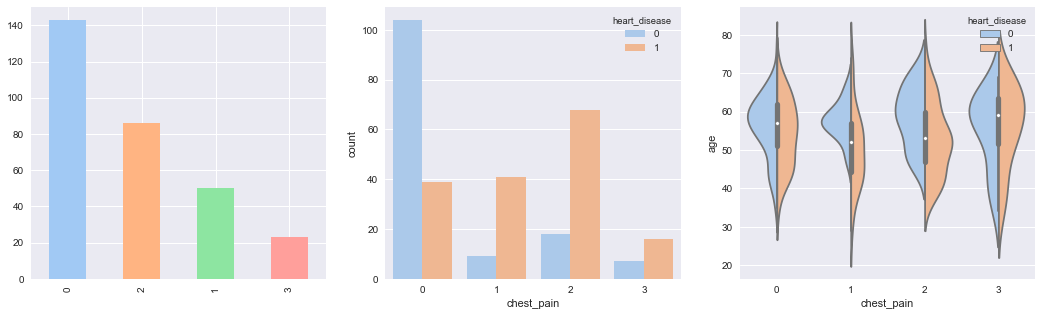

In [23]:
_,  ax = plt.subplots(1, 3, figsize=(18, 5))
plt.subplots_adjust(wspace=0.2)
data.chest_pain.value_counts().plot.bar(ax = ax[0])
sns.countplot(x = "chest_pain", hue = "heart_disease", data = data, ax=ax[1])
sns.violinplot(x = "chest_pain", y = "age", hue= "heart_disease", split = True, data = data, ax = ax[2])
sns.despine(left=True)

Patients with chest pain > 0 are likely to have heart disease.

## 4.resting_blood_pressure Analysis:
displays the resting blood pressure value of an individual in mmHg (unit)

In [24]:
data["resting_blood_pressure"].value_counts()

120    37
130    36
140    32
110    19
150    17
138    12
128    12
125    11
160    11
112     9
132     8
118     7
135     6
108     6
124     6
145     5
134     5
152     5
122     4
170     4
100     4
142     3
115     3
136     3
105     3
180     3
126     3
102     2
94      2
144     2
178     2
146     2
148     2
129     1
165     1
101     1
174     1
104     1
172     1
106     1
156     1
164     1
192     1
114     1
155     1
117     1
154     1
123     1
200     1
Name: resting_blood_pressure, dtype: int64

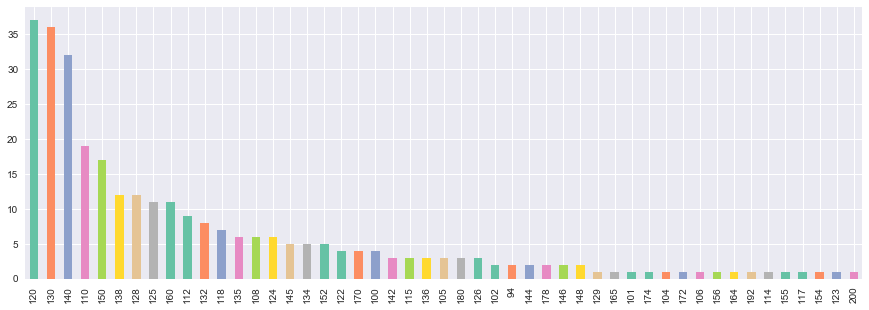

In [25]:
sns.set_palette("Set2")
plt.figure(figsize=(15, 5))
data.resting_blood_pressure.value_counts().plot.bar()

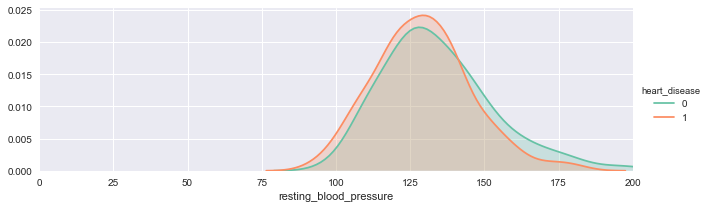

In [26]:
facet = sns.FacetGrid(data, hue = "heart_disease", aspect = 3)
facet.map(sns.kdeplot,"resting_blood_pressure",shade= True)
facet.set(xlim=(0, data["resting_blood_pressure"].max()))
facet.add_legend()

C:\Users\PC\Anaconda3\lib\site-packages\seaborn\categorical.py:2612: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


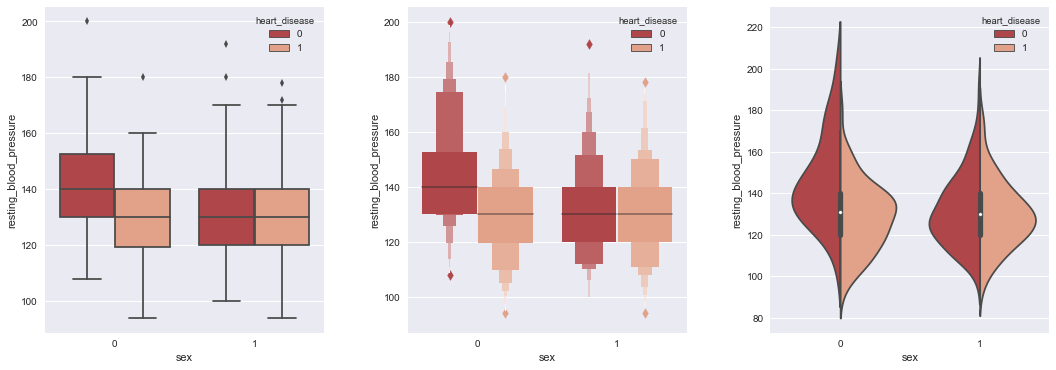

In [27]:
_, ax = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)
sns.set_palette("RdBu")
sns.boxplot(x = "sex", y = "resting_blood_pressure", hue="heart_disease", data=data, ax=ax[0])
sns.boxenplot(x = "sex", y = "resting_blood_pressure", data = data, hue="heart_disease", ax=ax[1])
sns.violinplot(x = "sex", y = "resting_blood_pressure", hue= "heart_disease", split = True, data = data, ax = ax[2])
sns.despine(left=True)

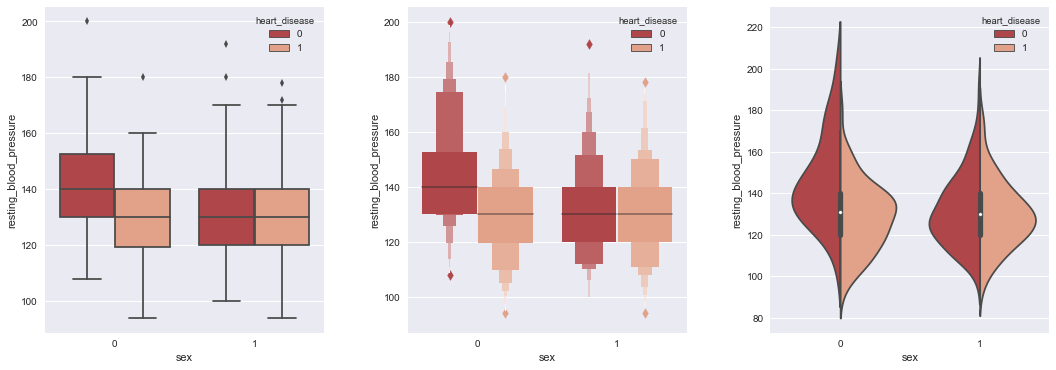

In [28]:
_, ax = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)
sns.set_palette("RdBu")
sns.boxplot(x = "sex", y = "resting_blood_pressure", hue="heart_disease", data=data, ax=ax[0])
sns.boxenplot(x = "sex", y = "resting_blood_pressure", data = data, hue="heart_disease", ax=ax[1])
sns.violinplot(x = "sex", y = "resting_blood_pressure", hue= "heart_disease", split = True, data = data, ax = ax[2])
sns.despine(left=True)

Average resting blood pressure for is the same for men ( with or without heart disease ) and women with heart disease.

## 5.Serum Cholestoral (chol) Analysis: 
displays the serum cholesterol in mg/dl (unit)

In [39]:
data.serum_cholesterol.unique()

array([233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 275, 266,
       211, 283, 219, 340, 226, 247, 234, 243, 302, 212, 175, 417, 197,
       198, 177, 273, 213, 304, 232, 269, 360, 308, 245, 208, 264, 321,
       325, 235, 257, 216, 256, 231, 141, 252, 201, 222, 260, 182, 303,
       265, 309, 186, 203, 183, 220, 209, 258, 227, 261, 221, 205, 240,
       318, 298, 564, 277, 214, 248, 255, 207, 223, 288, 160, 394, 315,
       246, 244, 270, 195, 196, 254, 126, 313, 262, 215, 193, 271, 268,
       267, 210, 295, 306, 178, 242, 180, 228, 149, 278, 253, 342, 157,
       286, 229, 284, 224, 206, 167, 230, 335, 276, 353, 225, 330, 290,
       172, 305, 188, 282, 185, 326, 274, 164, 307, 249, 341, 407, 217,
       174, 281, 289, 322, 299, 300, 293, 184, 409, 259, 200, 327, 237,
       218, 319, 166, 311, 169, 187, 176, 241, 131], dtype=int64)

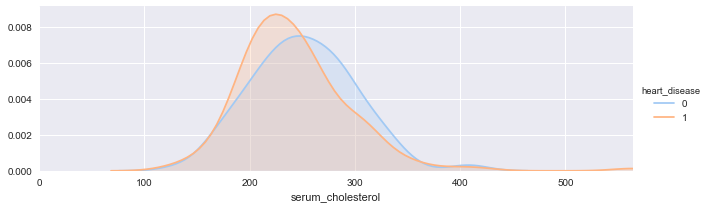

In [40]:
sns.set_palette("pastel")
facet = sns.FacetGrid(data , hue = "heart_disease", aspect = 3)
facet.map(sns.kdeplot,"serum_cholesterol",shade= True)
facet.set(xlim=(0, data["serum_cholesterol"].max()))
facet.add_legend()

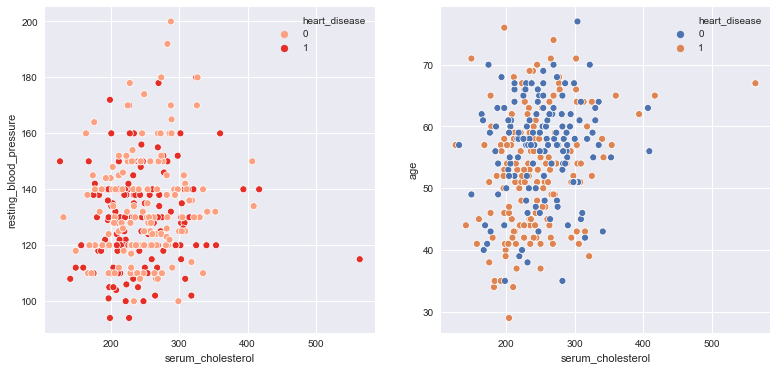

In [41]:
_, ax = plt.subplots(1, 2,figsize=(13, 6))
sns.scatterplot(x = "serum_cholesterol", y = "resting_blood_pressure", hue= "heart_disease", palette = "Reds", data=data, ax = ax[0])
sns.scatterplot(x = "serum_cholesterol", y = "age", hue= "heart_disease", palette = "deep", data=data, ax=ax[1])

## 6.Fasting blood sugar (120 mg/dl) Analysis:
compares the fasting blood sugar value of an individual with 120mg/dl.
If fasting blood sugar > 120mg/dl then : 1 (true)
else : 0 (false)

In [42]:
data.fasting_blood_sugar.unique()

array([1, 0], dtype=int64)

In [43]:
data.fasting_blood_sugar.value_counts()

0    257
1     45
Name: fasting_blood_sugar, dtype: int64

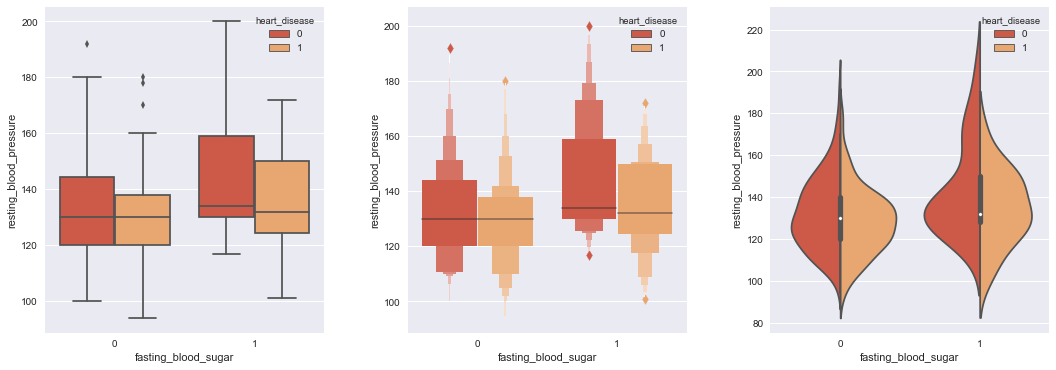

In [44]:
_, ax = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)
sns.set_palette("RdYlBu")
sns.boxplot(x = "fasting_blood_sugar", y = "resting_blood_pressure", hue="heart_disease", data=data, ax=ax[0])
sns.boxenplot(x = "fasting_blood_sugar", y = "resting_blood_pressure", data = data, hue="heart_disease", ax=ax[1])
sns.violinplot(x = "fasting_blood_sugar", y = "resting_blood_pressure", hue= "heart_disease", split = True, data = data, ax = ax[2])
sns.despine(left=True)

## 7.Resting electrocardiographic Analysis:
displays resting electrocardiographic results
0 = normal
1 = having ST-T wave abnormality
2 = left ventricular hyperthrophy

In [45]:
data.resting_electrocardiographic.unique()

array([0, 1, 2], dtype=int64)

In [46]:
data.resting_electrocardiographic.value_counts()

1    151
0    147
2      4
Name: resting_electrocardiographic, dtype: int64

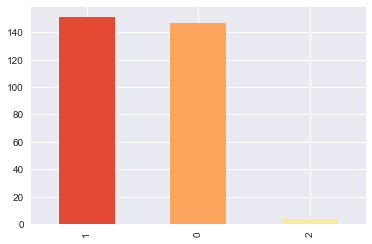

In [47]:
data.resting_electrocardiographic.value_counts().plot.bar()

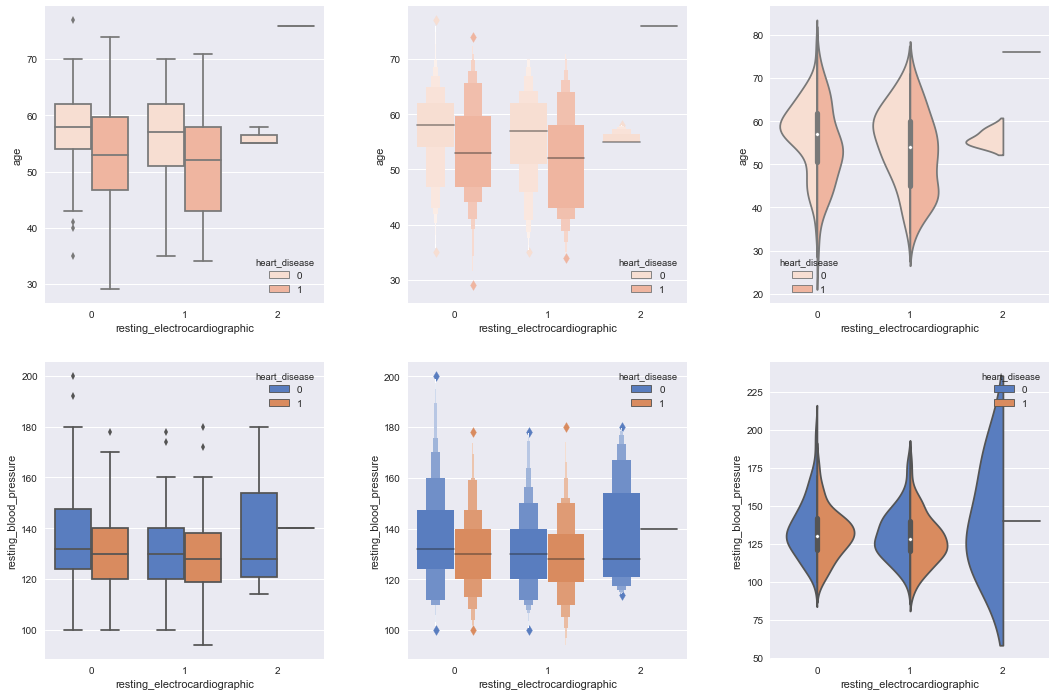

In [48]:
_, ax = plt.subplots(2, 3, figsize=(18, 12))
plt.subplots_adjust(wspace=0.3)
sns.set_palette("Reds")

sns.boxplot(x = "resting_electrocardiographic", y = "age", hue = "heart_disease", data = data, ax = ax[0][0])
sns.boxenplot(x = "resting_electrocardiographic", y = "age", data = data, hue = "heart_disease", ax = ax[0][1])
sns.violinplot(x = "resting_electrocardiographic", y = "age", hue= "heart_disease", split = True, data = data, ax = ax[0][2])

sns.set_palette("muted")

sns.boxplot(x = "resting_electrocardiographic", y = "resting_blood_pressure", hue="heart_disease", data=data, ax=ax[1][0])
sns.boxenplot(x = "resting_electrocardiographic", y = "resting_blood_pressure", data = data, hue="heart_disease", ax=ax[1][1])
sns.violinplot(x = "resting_electrocardiographic", y = "resting_blood_pressure", hue= "heart_disease", split = True, data = data, ax = ax[1][2])
sns.despine(left=True)

## 8.Maximum heart rate achieved Analysis: displays the max heart rate achieved by an individual.

In [49]:
data.maximum_heart_rate.unique()

array([150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, 171,
       144, 158, 114, 151, 161, 179, 137, 157, 123, 152, 168, 140, 188,
       125, 170, 165, 142, 180, 143, 182, 156, 115, 149, 146, 175, 186,
       185, 159, 130, 190, 132, 147, 154, 202, 166, 164, 184, 122, 169,
       138, 111, 145, 194, 131, 133, 155, 167, 192, 121,  96, 126, 105,
       181, 116, 108, 129, 120, 112, 128, 109, 113,  99, 177, 141, 136,
        97, 127, 103, 124,  88, 195, 106,  95, 117,  71, 118, 134,  90],
      dtype=int64)

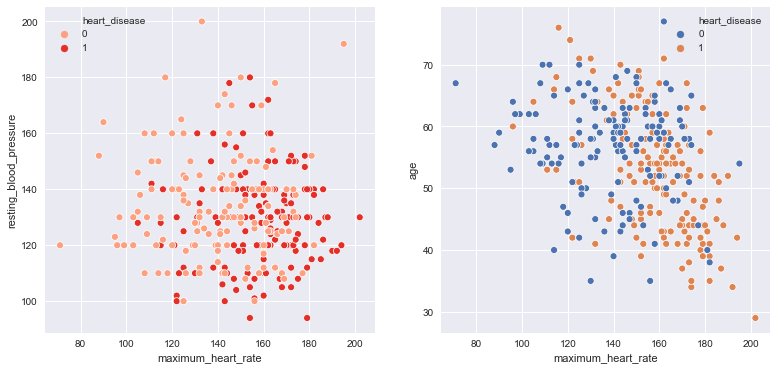

In [50]:
_, ax = plt.subplots(1, 2,figsize=(13, 6))
sns.scatterplot(x = "maximum_heart_rate", y = "resting_blood_pressure", hue= "heart_disease", palette = "Reds", data=data, ax = ax[0])
sns.scatterplot(x = "maximum_heart_rate", y = "age", hue= "heart_disease", palette = "deep", data=data, ax=ax[1])

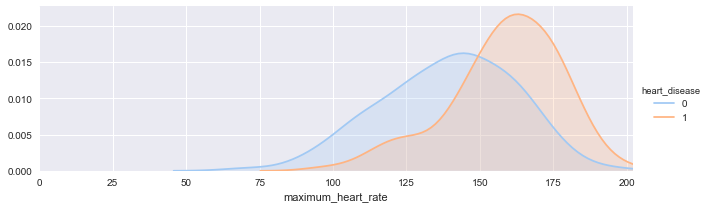

In [51]:
sns.set_palette("pastel")
facet = sns.FacetGrid(data, hue = "heart_disease", aspect = 3)
facet.map(sns.kdeplot,"maximum_heart_rate",shade= True)
facet.set(xlim=(0, data["maximum_heart_rate"].max()))
facet.add_legend()

## 9.Exercise induced angina Analysis:
1 = yes
0 = no


In [52]:
data.exercise_induced_angina.unique()

array([0, 1], dtype=int64)

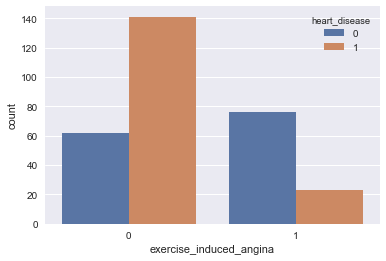

In [53]:
sns.set_palette("deep")
sns.countplot(x = "exercise_induced_angina", hue = "heart_disease", data = data)

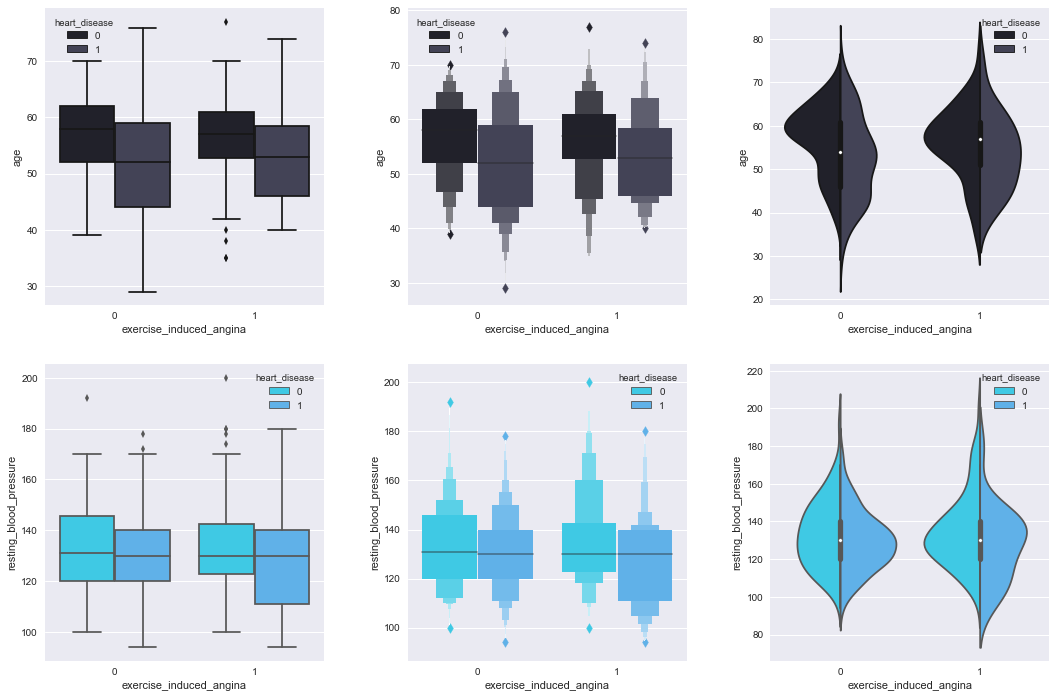

In [54]:
_, ax = plt.subplots(2, 3, figsize=(18, 12))
plt.subplots_adjust(wspace=0.3)
sns.set_palette("bone")

sns.boxplot(x = "exercise_induced_angina", y = "age", hue = "heart_disease", data = data, ax = ax[0][0])
sns.boxenplot(x = "exercise_induced_angina", y = "age", data = data, hue = "heart_disease", ax = ax[0][1])
sns.violinplot(x = "exercise_induced_angina", y = "age", hue= "heart_disease", split = True, data = data, ax = ax[0][2])

sns.set_palette("cool")

sns.boxplot(x = "exercise_induced_angina", y = "resting_blood_pressure", hue="heart_disease", data=data, ax=ax[1][0])
sns.boxenplot(x = "exercise_induced_angina", y = "resting_blood_pressure", data = data, hue="heart_disease", ax=ax[1][1])
sns.violinplot(x = "exercise_induced_angina", y = "resting_blood_pressure", hue= "heart_disease", split = True, data = data, ax = ax[1][2])
sns.despine(left=True)


## 10.ST depression induced by exercise relative to rest | Analysis:
displays the value which is an integer or float.

In [55]:
data.oldpeak.unique()

array([2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0. , 0.5, 1.6, 1.2, 0.2, 1.8,
       1. , 2.6, 1.5, 3. , 2.4, 0.1, 1.9, 4.2, 1.1, 2. , 0.7, 0.3, 0.9,
       3.6, 3.1, 3.2, 2.5, 2.2, 2.8, 3.4, 6.2, 4. , 5.6, 2.9, 2.1, 3.8,
       4.4])

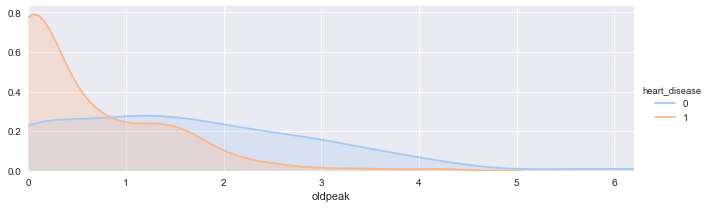

In [56]:
sns.set_palette("pastel")
facet = sns.FacetGrid(data, hue = "heart_disease", aspect = 3)
facet.map(sns.kdeplot,"oldpeak",shade= True)
facet.set(xlim=(0, data["oldpeak"].max()))
facet.add_legend()

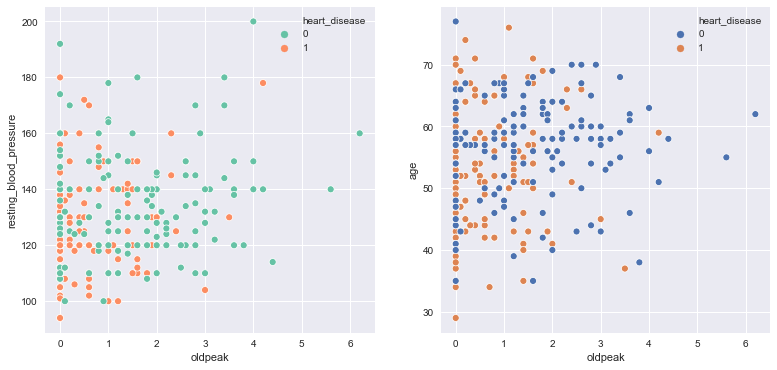

In [57]:
_, ax = plt.subplots(1, 2,figsize=(13, 6))
sns.scatterplot(x = "oldpeak", y = "resting_blood_pressure", hue= "heart_disease", palette = "Set2", data=data, ax = ax[0])
sns.scatterplot(x = "oldpeak", y = "age", hue= "heart_disease", palette = "deep", data=data, ax=ax[1])

## 11.The slope of the peak exercise ST segment | Analysis
1 = upsloping
2 = flat
3 = downsloping

In [58]:
data.slope.unique()

array([0, 2, 1], dtype=int64)

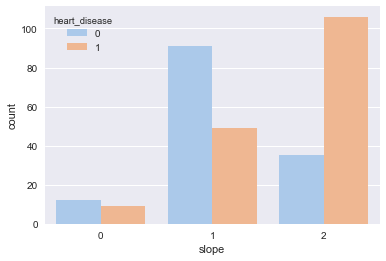

In [59]:
sns.countplot(x = "slope", hue="heart_disease", data = data)

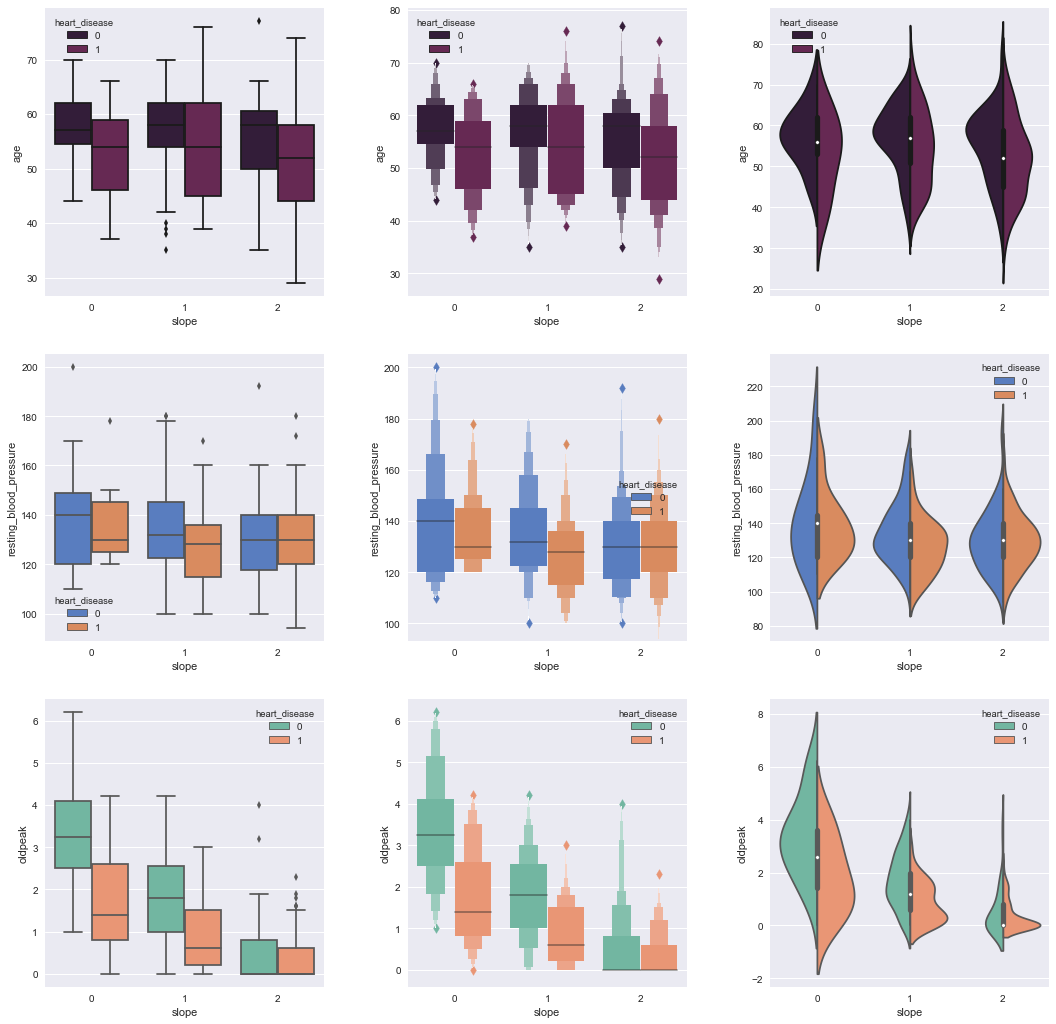

In [60]:
_, ax = plt.subplots(3, 3, figsize=(18, 18))
plt.subplots_adjust(wspace=0.3)
sns.set_palette("rocket")

sns.boxplot(x = "slope", y = "age", hue = "heart_disease", data = data, ax = ax[0][0])
sns.boxenplot(x = "slope", y = "age", data = data, hue = "heart_disease", ax = ax[0][1])
sns.violinplot(x = "slope", y = "age", hue= "heart_disease", split = True, data = data, ax = ax[0][2])

sns.set_palette("muted")

sns.boxplot(x = "slope", y = "resting_blood_pressure", hue="heart_disease", data=data, ax=ax[1][0])
sns.boxenplot(x = "slope", y = "resting_blood_pressure", data = data, hue="heart_disease", ax=ax[1][1])
sns.violinplot(x = "slope", y = "resting_blood_pressure", hue= "heart_disease", split = True, data = data, ax = ax[1][2])

sns.set_palette("Set2")

sns.boxplot(x = "slope", y = "oldpeak", hue="heart_disease", data=data, ax=ax[2][0])
sns.boxenplot(x = "slope", y = "oldpeak", data = data, hue="heart_disease", ax=ax[2][1])
sns.violinplot(x = "slope", y = "oldpeak", hue= "heart_disease", split = True, data = data, ax = ax[2][2])
sns.despine(left=True)

## 12.Number of major vessels (0-3) colored by flourosopy 

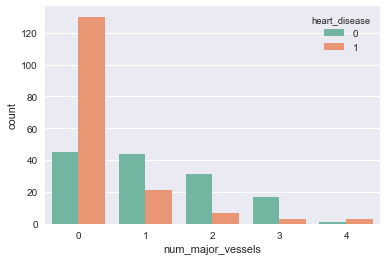

In [61]:
sns.countplot(x = "num_major_vessels", hue = "heart_disease", data = data)

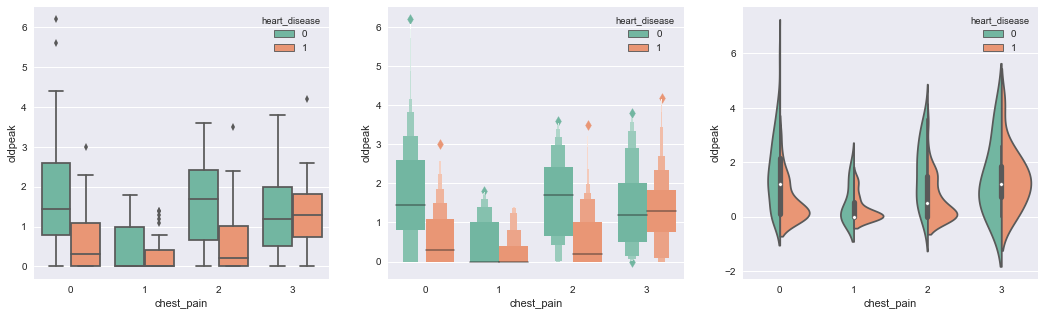

In [62]:
_, ax = plt.subplots(1, 3, figsize=(18, 5))
sns.set_palette("Set2")
sns.boxplot(x = "chest_pain", y = "oldpeak", hue="heart_disease", data=data, ax=ax[0])
sns.boxenplot(x = "chest_pain", y = "oldpeak", data = data, hue="heart_disease", ax=ax[1])
sns.violinplot(x = "chest_pain", y = "oldpeak", hue= "heart_disease", split = True, data = data, ax = ax[2])
sns.despine(left=True)

## 13. Thal A blood disorder called thalassemia (0 = normal; 1 = fixed defect; 2= reversable defect) 

In [63]:
data.thal.unique()

array([1, 2, 3, 0], dtype=int64)

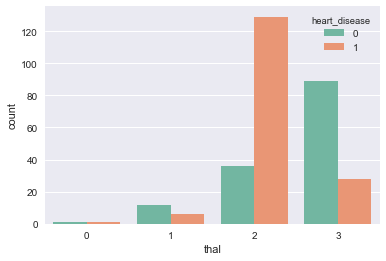

In [64]:
sns.countplot(x = "thal", hue = "heart_disease", data = data)

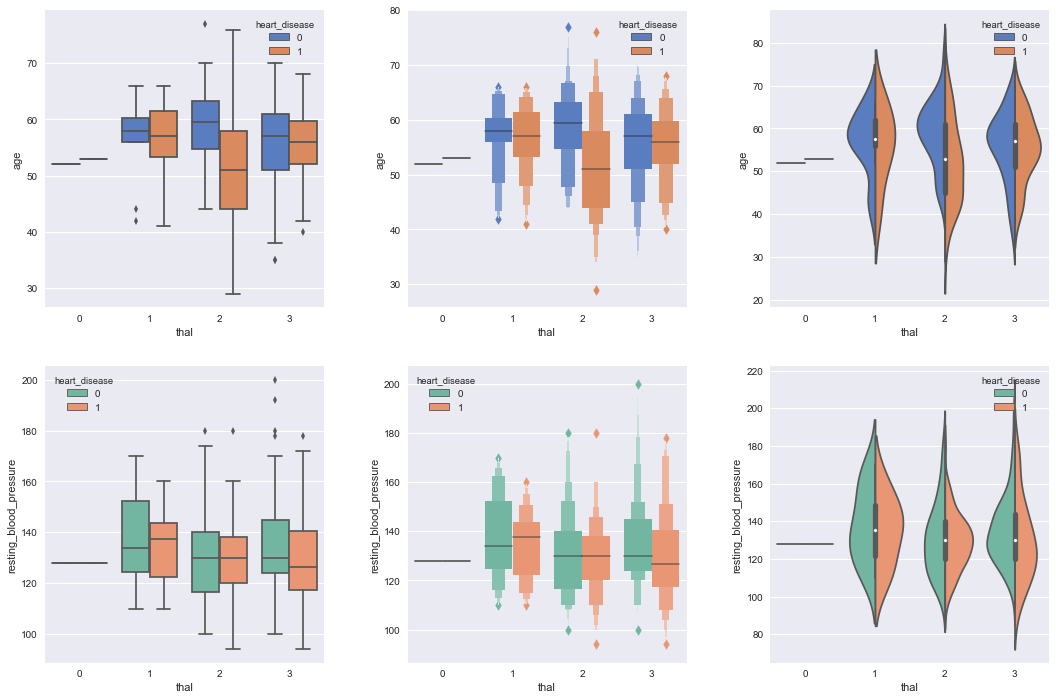

In [65]:
_, ax = plt.subplots(2, 3, figsize=(18, 12))
plt.subplots_adjust(wspace=0.3)
sns.set_palette("muted")

sns.boxplot(x = "thal", y = "age", hue = "heart_disease", data = data, ax = ax[0][0])
sns.boxenplot(x = "thal", y = "age", data = data, hue = "heart_disease", ax = ax[0][1])
sns.violinplot(x = "thal", y = "age", hue= "heart_disease", split = True, data = data, ax = ax[0][2])


sns.set_palette("Set2")

sns.boxplot(x = "thal", y = "resting_blood_pressure", hue="heart_disease", data=data, ax=ax[1][0])
sns.boxenplot(x = "thal", y = "resting_blood_pressure", data = data, hue="heart_disease", ax=ax[1][1])
sns.violinplot(x = "thal", y = "resting_blood_pressure", hue= "heart_disease", split = True, data = data, ax = ax[1][2])
sns.despine(left=True)

## Correlation matrix

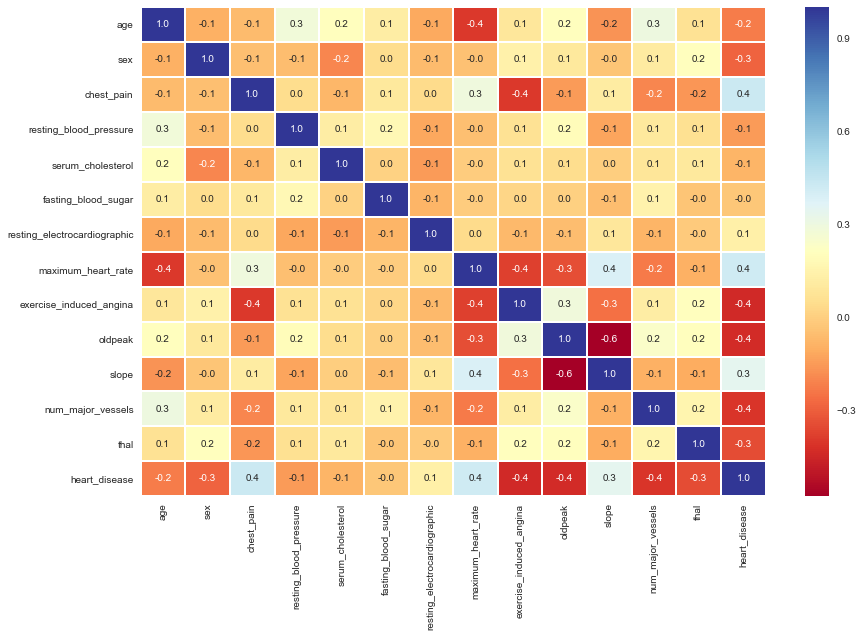

In [69]:
plt.figure(figsize=(14, 9))
correlations=data.corr()
sns.heatmap(data = data.corr(), cmap="RdYlBu", fmt=".1f", annot=True, linewidths=1)

In [70]:
pd.DataFrame(correlations['heart_disease']).sort_values(by='heart_disease', ascending=False)

,heart_disease
heart_disease,1.000000
chest_pain,0.432080
maximum_heart_rate,0.419955
slope,0.343940
resting_electrocardiographic,0.134874
fasting_blood_sugar,-0.026826
serum_cholesterol,-0.081437
resting_blood_pressure,-0.146269
age,-0.221476
sex,-0.283609


Chest pain, maximum heart pain , oldpeak and exercice_induced_angina are the features who affect the most the output.

In [223]:
#  Split into Test and Training Data
X_train, X_test, y_train, y_test = train_test_split(
        data.drop('heart_disease', 1), 
        data['heart_disease'], 
        test_size = 0.25, 
        random_state=10
        ) 

In [224]:
data.heart_disease.value_counts()
#The data is almost balanced

1    164
0    138
Name: heart_disease, dtype: int64

## Feature Engineering

### 1.Using Statistical Numbers

In [225]:
tmp_train = X_train
tmp_test=X_test
feat = [ "var", "median", "mean", "std", "max", "min"]
for i in feat:
    X_train[i] = tmp_train.aggregate(i,  axis =1)
    X_test[i]  = tmp_test.aggregate(i,axis = 1)

In [226]:
# Delete not needed variables and release memory
del(tmp_train)
del(tmp_test)
gc.collect()

70

In [227]:
# So what do we have finally
X_train.shape                
X_train.head(1)
X_test.shape                 
X_test.head(2)

,age,sex,chest_pain,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_electrocardiographic,maximum_heart_rate,exercise_induced_angina,oldpeak,slope,num_major_vessels,thal,var,median,mean,std,max,min
205,52,1,0,128,255,0,1,161,1,0.0,2,1,3,6824.602564,1.5,495.406838,1693.198834,6824.602564,0.0
154,39,0,2,138,220,0,1,152,0,0.0,1,0,2,5698.730769,1.5,417.015385,1413.248885,5698.730769,0.0


In [228]:
target = y_train
target.tail(2)

125    1
266    0
Name: heart_disease, dtype: int64

In [229]:

colNames = X_train.columns.values
colNames

array(['age', 'sex', 'chest_pain', 'resting_blood_pressure',
       'serum_cholesterol', 'fasting_blood_sugar',
       'resting_electrocardiographic', 'maximum_heart_rate',
       'exercise_induced_angina', 'oldpeak', 'slope', 'num_major_vessels',
       'thal', 'var', 'median', 'mean', 'std', 'max', 'min'], dtype=object)

### 2.Feature creation Using Random Projections

Random projection is a fast dimensionality reduction feature


In [230]:
tmp = pd.concat([X_train,X_test],
                axis = 0,            
                ignore_index = True
                )

In [231]:
tmp.shape     

(302, 19)

In [232]:
NUM_OF_COM = 6

In [233]:
rp_instance = sr(n_components = NUM_OF_COM)
print (rp_instance)
rp = rp_instance.fit_transform(tmp.iloc[:,:13])

SparseRandomProjection(dense_output=False, density='auto', eps=0.1,
            n_components=6, random_state=None)


In [234]:
rp_col_names = ["r" + str(i) for i in range(6)]
rp_col_names


['r0', 'r1', 'r2', 'r3', 'r4', 'r5']

### 3.Creating Interaction features using Polynomials


In [235]:
degree = 2
poly = PolynomialFeatures(degree,                 
                          interaction_only=True,  
                          include_bias = False) 
df =  poly.fit_transform(tmp.iloc[:, : 8])
poly_names = [ "poly" + str(i)  for i in range(36)]

df.shape

(302, 36)

### Conatenate all features 

In [236]:
tmp = np.hstack([tmp,rp, df]) 
tmp.shape
X=tmp 
del tmp
gc.collect()
y = pd.concat([y_train,y_test],
                axis = 0,            
                ignore_index = True
                )


In [237]:
X.shape

(302, 61)

# Model Building using Random Forests
To classify a new object with attributes a tree is planted and a tree votes for a specific class and the forest chooses the class with most votes.

In [240]:
X_train, X_test, y_train, y_test = train_test_split(
                                                    X,
                                                    y,
                                                    test_size = 0.25)

In [241]:
from sklearn.model_selection import RandomizedSearchCV


In [242]:
#HP tuning using grid search
rf_param_grid = {
                 'max_depth' : [4, 6, 8,10],
                 'n_estimators': range(1,30),
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3, 10,20],
                 'min_samples_leaf': [1, 3, 10,18],
                 'bootstrap': [True, False],
                 
                 }

In [243]:
rfc= RandomForestClassifier()

In [244]:
models = RandomizedSearchCV(param_distributions=rf_param_grid, 
                                    estimator = rfc, scoring = "accuracy", 
                                    verbose = 0, n_iter = 100, cv = 5)

models.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=1,
          param_distributions={'max_depth': [4, 6, 8, 10], 'n_estimators': range(1, 30), 'max_features': ['sqrt', 'auto', 'log2'], 'min_samples_split': [2, 3, 10, 20], 'min_samples_leaf': [1, 3, 10, 18], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=0)

In [245]:
models.best_score_

0.827433628318584

In [246]:
models.best_params_

{'bootstrap': False,
 'max_depth': 8,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 20}

In [247]:
par=models.best_params_

In [248]:
best_model=RandomForestClassifier(n_estimators=par["n_estimators"],
                                     min_samples_split=par['min_samples_split'],
                                     min_samples_leaf=par['min_samples_leaf'],
                                     max_features=par['max_features'],
                                     max_depth=par['max_depth'],
                                     bootstrap=par['bootstrap'])

In [249]:
best_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Feature Importance Using Random Forests

In [250]:
importances = best_model.feature_importances_
colNames = list(colNames) + rp_col_names +  poly_names 
len(colNames)

61

In [251]:
feat_imp = pd.DataFrame({
                   "importance": importances,
                   "featureNames" : colNames
                  }
                 ).sort_values(by = "importance", ascending=False)

In [252]:
feat_imp.head(13)


,featureNames,importance
34,poly9,0.074773
2,chest_pain,0.050345
11,num_major_vessels,0.049697
12,thal,0.041782
47,poly22,0.039447
50,poly25,0.036093
9,oldpeak,0.033816
32,poly7,0.033253
10,slope,0.032603
27,poly2,0.030215


We can notice that some of the features we generated were among the most important features to the model

[Text(0,0,''), Text(0,0,''), Text(0,0,''), Text(0,0,''), Text(0,0,'')]

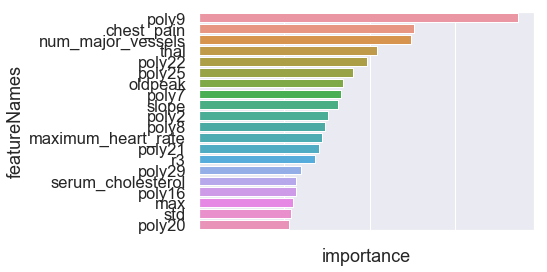

In [253]:
g = sns.barplot(x = feat_imp.iloc[  : 30 ,  1] , y = feat_imp.iloc[ : 20, 0])
g.set_xticklabels(g.get_xticklabels(),rotation=90)

In [254]:
predictions = best_model.predict(X_test)

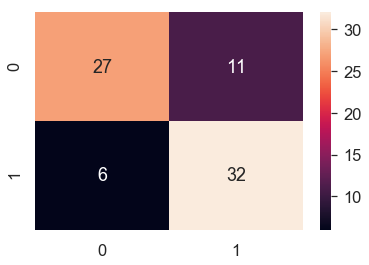

In [255]:
#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(predictions, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()